<a href="https://colab.research.google.com/github/Kushal1306/ML-Algorithms/blob/main/fcc_bikes_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import copy
import seaborn as sns
from sklearn.linear_model import LinearRegression
import tensorflow as tf

Dataset


In [3]:
dataset_cols = ["bike_count", "hour", "temp", "humidity", "wind", "visibility", "dew_pt_temp", "radiation", "rain", "snow", "functional"]
df = pd.read_csv("SeoulBikeData.csv").drop(["Date", "Holiday", "Seasons"], axis=1)

In [4]:
df=pd.read_csv("SeoulBikeData.csv").drop(["Date","Holiday","Seasons"],axis=1)

In [5]:
df.columns = dataset_cols
df["functional"] = (df["functional"] == "Yes").astype(int)
df=df[df["hour"]==12]
df=df.drop(["hour"],axis=1)


In [6]:
df.head()

,bike_count,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1


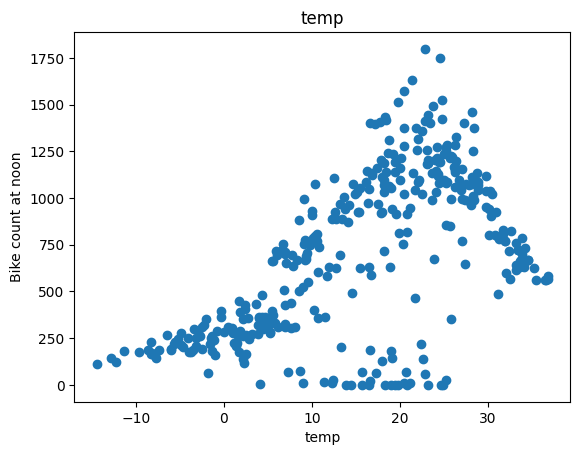

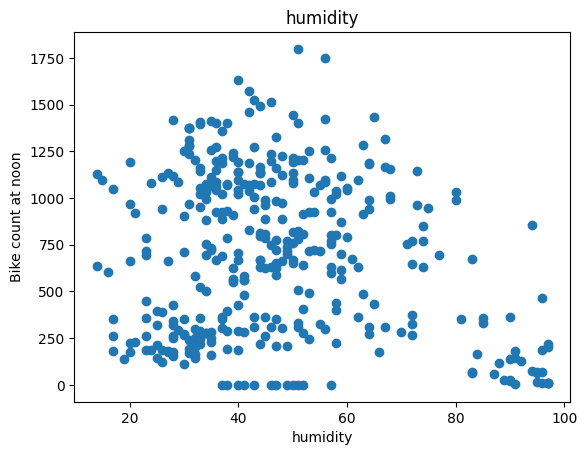

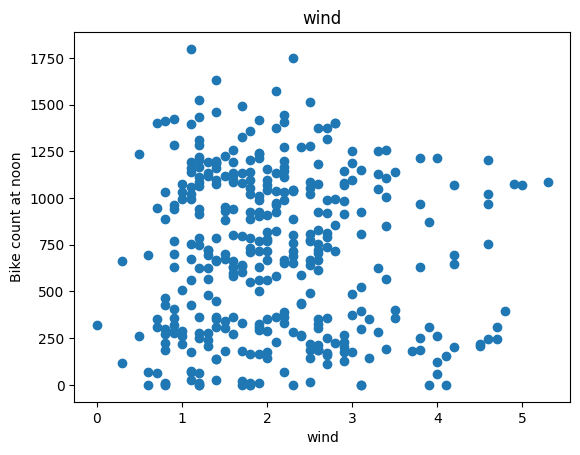

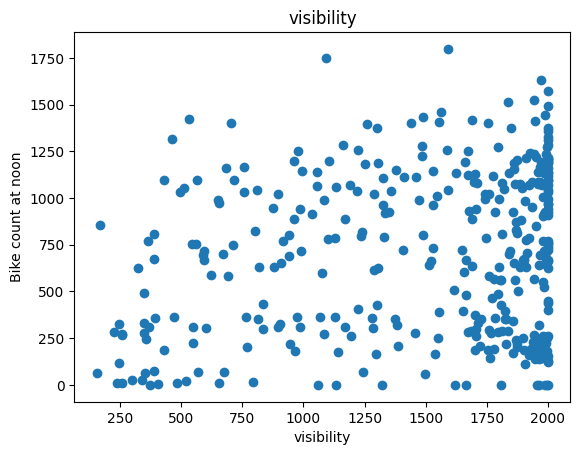

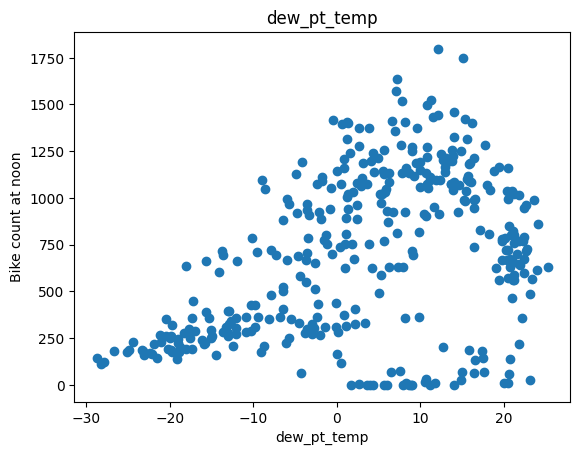

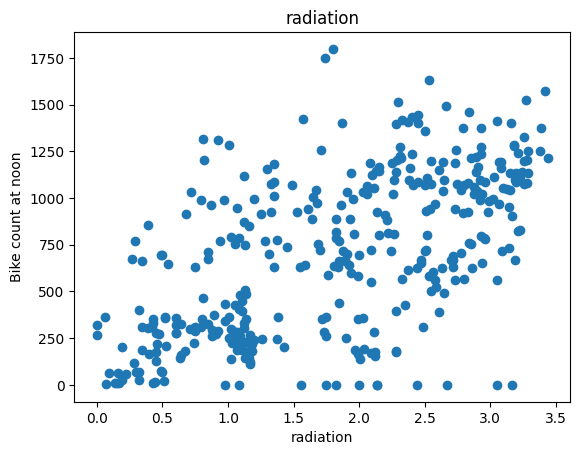

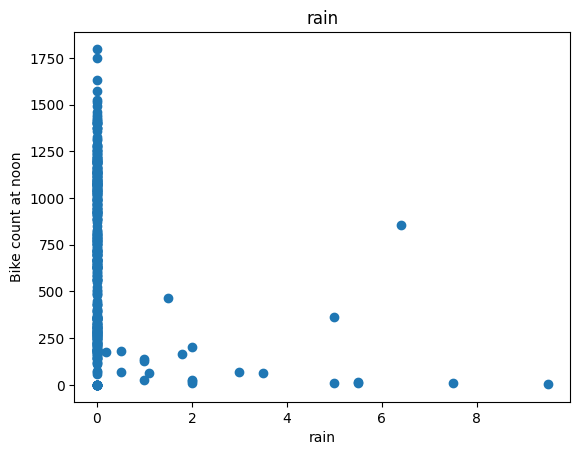

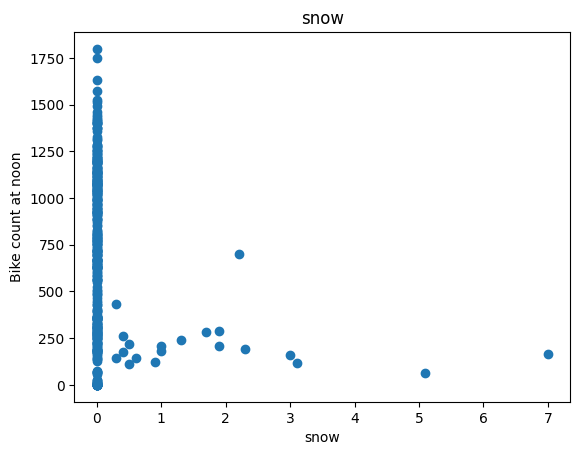

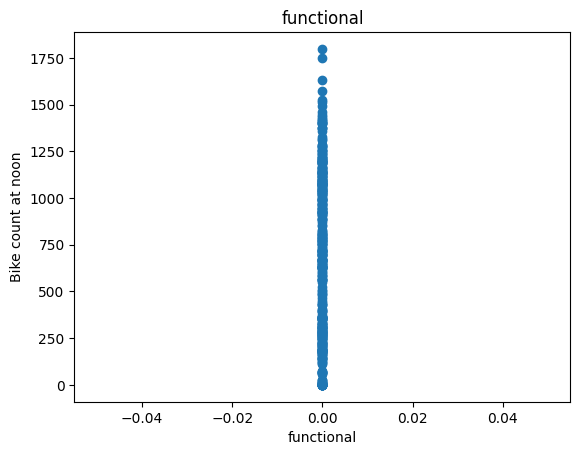

In [35]:
for label in df.columns[1:]:
  plt.scatter(df[label],df["bike_count"])
  plt.title(label)
  plt.ylabel("Bike count at noon")
  plt.xlabel(label)
  plt.show()

In [7]:
df=df.drop(["wind","visibility","functional"],axis=1)

In [45]:
df.head()

,bike_count,temp,humidity,dew_pt_temp,radiation,rain,snow
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0


In [46]:
train,val,test=np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])

In [8]:
def get_xy(dataframe, y_label, x_labels=None):
  dataframe = copy.deepcopy(dataframe)
  if x_labels is None:
    x = dataframe[[c for c in dataframe.columns if c!=y_label]].values
  else:
    if len(x_labels) == 1:
      x = dataframe[x_labels[0]].values.reshape(-1, 1)
    else:
      x = dataframe[x_labels].values

  y = dataframe[y_label].values.reshape(-1, 1)
  data = np.hstack((x, y))

  return data, x, y

In [15]:
_, x_train_temp, y_train_temp = get_xy(train, "bike_count", x_labels=["temp"])
_, x_val_temp, y_val_temp = get_xy(val, "bike_count", x_labels=["temp"])
_, x_test_temp, y_test_temp = get_xy(test, "bike_count", x_labels=["temp"])

In [54]:
temp_reg=LinearRegression()
temp_reg.fit(x_train_temp,y_train_temp)

LinearRegression()

In [55]:
temp_reg.score(x_test_temp,y_test_temp)

0.23570211216040393

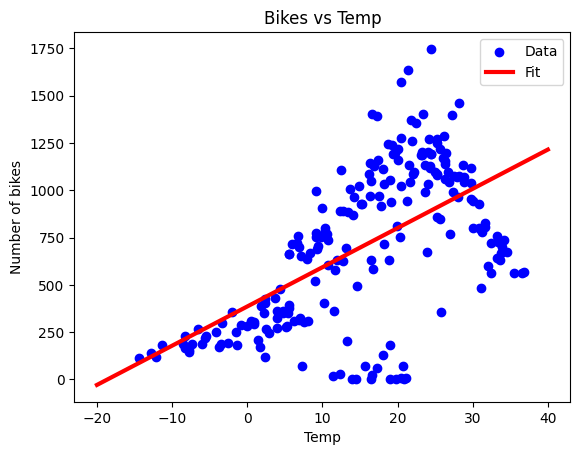

In [60]:
plt.scatter(x_train_temp,y_train_temp,label="Data",color="blue")
x=tf.linspace(-20,40,100)
plt.plot(x,temp_reg.predict(np.array(x).reshape(-1,1)),label="Fit",color="red",linewidth=3)
plt.legend()
plt.title("Bikes vs Temp")
plt.ylabel("Number of bikes")
plt.xlabel("Temp")
plt.show()

Multiple linear regression

In [62]:
df.columns

Index(['bike_count', 'temp', 'humidity', 'dew_pt_temp', 'radiation', 'rain',
       'snow'],
      dtype='object')

In [9]:
train,val,test=np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])
_,x_train_all,y_train_all=get_xy(train,"bike_count",x_labels=df.columns[1:])
_,x_val_all,y_val_all=get_xy(val,"bike_count",x_labels=df.columns[1:])
_,x_test_all,y_test_all=get_xy(test,"bike_count",x_labels=df.columns[1:])


In [38]:
all_reg=LinearRegression()
all_reg.fit(x_train_all,y_train_all)

LinearRegression()

In [39]:
all_reg.score(x_test_all,y_test_all)

0.47663726412502827

In [40]:
all_reg.predict(x_test_all)

array([[ 5.14497709e+02],
       [ 1.00761966e+03],
       [ 1.01450315e+03],
       [ 4.90649759e+02],
       [ 1.11257168e+03],
       [ 7.23275466e+02],
       [ 1.04194563e+03],
       [ 4.75525503e+02],
       [ 1.10360181e+03],
       [ 9.78746805e+02],
       [ 1.09447056e+03],
       [ 4.24473557e+02],
       [ 1.11811880e+03],
       [ 8.37539879e+02],
       [ 8.76119382e+02],
       [ 7.61369985e+02],
       [ 1.08582269e+03],
       [ 6.96875898e+02],
       [ 9.67410439e+02],
       [ 6.33673259e+02],
       [ 7.20618702e+02],
       [ 1.02075669e+03],
       [ 8.36248866e+02],
       [ 8.55511542e+02],
       [ 7.71830626e+02],
       [ 3.61778932e+02],
       [ 3.75892167e+02],
       [ 4.45265447e+02],
       [ 1.01932260e+03],
       [ 1.08586944e+03],
       [ 4.39707957e+02],
       [ 4.22411096e+02],
       [ 4.98265710e+02],
       [ 7.25565994e+02],
       [ 8.56793112e+02],
       [ 1.03091295e+03],
       [ 9.29561646e+02],
       [ 3.08668237e+02],
       [ 1.0

Regression with neural Net

In [19]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('MSE')
  plt.legend()
  plt.grid(True)
  plt.show()

In [16]:
temp_normalizer=tf.keras.layers.Normalization(input_shape=(1,),axis=None)
temp_normalizer.adapt(x_train_temp.reshape(-1))

In [17]:
temp_nn_model=tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(1)
])

In [18]:
temp_nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),loss='mean_squared_error')

In [20]:
history=temp_nn_model.fit(
    x_train_temp.reshape(-1),y_train_temp,
    verbose=0,
    epochs=1000,
    validation_data=(x_val_temp,y_val_temp)
    )

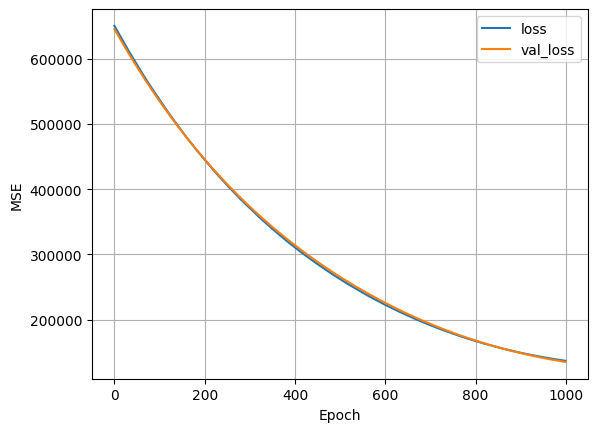

In [21]:
plot_loss(history)

Neural Net

In [30]:
temp_normalizer=tf.keras.layers.Normalization(input_shape=(1,),axis=None)
temp_normalizer.adapt(x_train_temp.reshape(-1))
nn_model=tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(1)
])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='mean_squared_error')

In [31]:
history=nn_model.fit(
    x_train_temp,y_train_temp,
    validation_data=(x_val_temp,y_val_temp),
    verbose=0,epochs=100
)

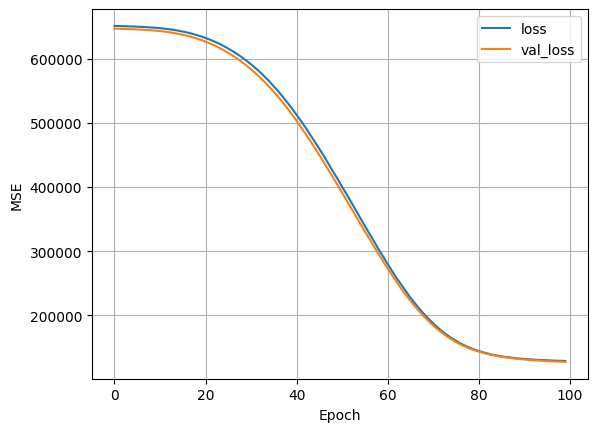

In [32]:
plot_loss(history)

4/4 [==============================] - 0s 2ms/step


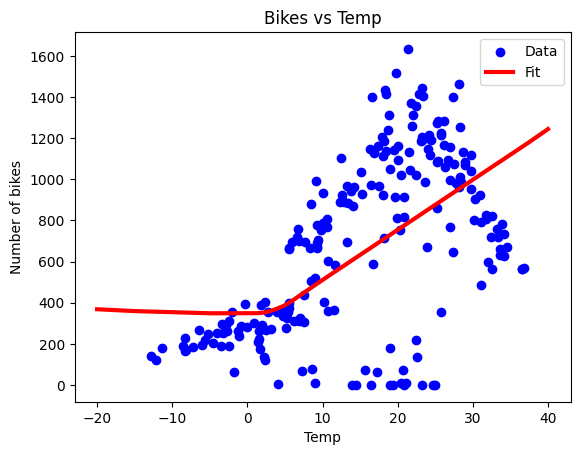

In [33]:
plt.scatter(x_train_temp,y_train_temp,label="Data",color="blue")
x=tf.linspace(-20,40,100)
plt.plot(x,nn_model.predict(np.array(x).reshape(-1,1)),label="Fit",color="red",linewidth=3)
plt.legend()
plt.title("Bikes vs Temp")
plt.ylabel("Number of bikes")
plt.xlabel("Temp")
plt.show()

In [47]:
all_normalizer=tf.keras.layers.Normalization(input_shape=(6,),axis=-1)
all_normalizer.adapt(x_train_all)


In [48]:
nn_model=tf.keras.Sequential([
    all_normalizer,
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(1)
])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='mean_squared_error')

In [49]:
history=nn_model.fit(
    x_train_all,y_train_all,
    validation_data=(x_val_all,y_val_all),
    verbose=0,epochs=100
)

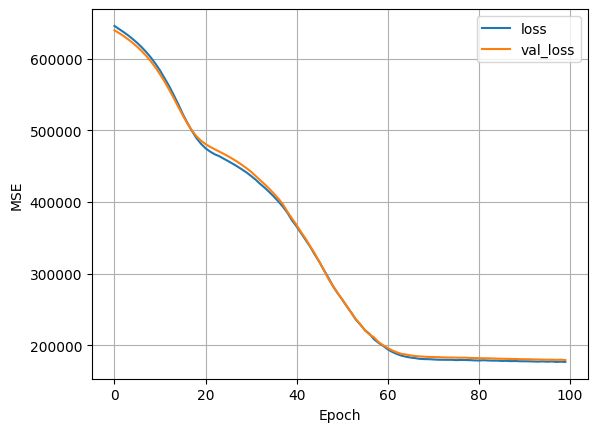

In [37]:
plot_loss(history)

In [50]:
#calculate MSE FOR BOTH LINEAR REG AND NN
y_pred_lr=all_reg.predict(x_test_all)
y_pred_nn=nn_model.predict(x_test_all)

3/3 [==============================] - 0s 2ms/step


In [51]:
def MSE(y_pred,y_real):
  return (np.square(y_pred-y_real)).mean()

In [52]:
MSE(y_pred_lr,y_test_all)

107829.52796335069

In [55]:
MSE(y_pred_nn,y_test_all)

115916.93688563522

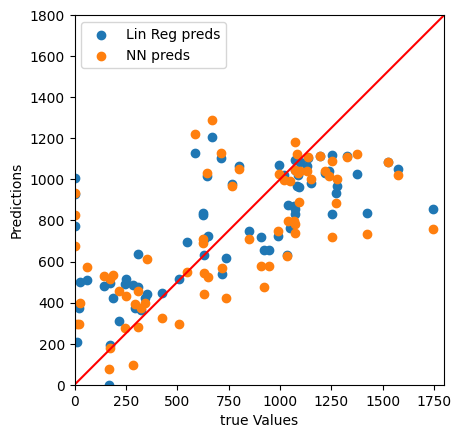

In [60]:
ax=plt.axes(aspect="equal")
plt.scatter(y_test_all,y_pred_lr,label="Lin Reg preds")
plt.scatter(y_test_all,y_pred_nn,label="NN preds")

plt.xlabel("true Values")
plt.ylabel("Predictions")
lims=[0,1800]
plt.xlim(lims)
plt.ylim(lims)
plt.legend()
_=plt.plot(lims,lims,c="red")